#  CLASSIFY TRAFFIC SIGNS 


- The dataset contains 43 different classes of images. 


- The network used is called Le-Net 


#  IMPORT  DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:

import pickle
import seaborn as sns
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

# DATA EXPLORATION

36

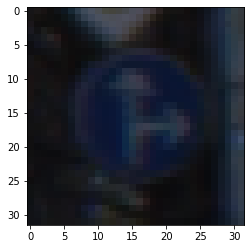

In [7]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

In [11]:
X_train[0]

array([[[ 71,  68,  62],
        [ 70,  73,  65],
        [136, 112,  98],
        ...,
        [ 48,  50,  42],
        [ 57,  64,  55],
        [ 53,  57,  51]],

       [[ 48,  56,  50],
        [ 47,  52,  45],
        [ 57,  58,  47],
        ...,
        [ 46,  50,  45],
        [ 41,  46,  40],
        [ 38,  41,  36]],

       [[ 30,  42,  35],
        [ 33,  37,  29],
        [ 36,  37,  31],
        ...,
        [ 40,  45,  43],
        [ 37,  35,  31],
        [ 44,  39,  34]],

       ...,

       [[ 44,  43,  43],
        [ 46,  45,  44],
        [ 51,  48,  49],
        ...,
        [ 50,  51,  51],
        [ 43,  45,  45],
        [ 39,  40,  39]],

       [[ 46,  44,  41],
        [ 47,  44,  43],
        [ 51,  48,  48],
        ...,
        [ 49,  53,  52],
        [ 45,  46,  45],
        [ 44,  44,  44]],

       [[ 46,  42,  41],
        [ 45,  42,  41],
        [ 50,  47,  46],
        ...,
        [ 51,  57,  58],
        [ 46,  47,  47],
        [ 46,  45,  47]]

# DATA PEPARATION

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

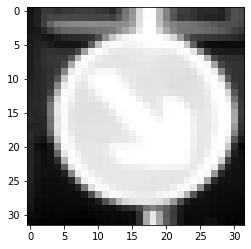

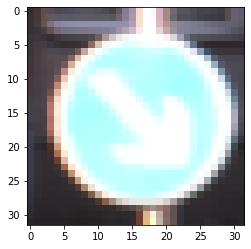

In [15]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# STEP 4: MODEL TRAINING

In [16]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [17]:
image_shape = X_train_gray[i].shape

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [20]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 8s 237us/step - loss: 3.2288 - accuracy: 0.1682 - val_loss: 2.7682 - val_accuracy: 0.3324
Epoch 2/50
34799/34799 [==============================] - 8s 226us/step - loss: 1.6966 - accuracy: 0.5344 - val_loss: 1.5015 - val_accuracy: 0.5510
Epoch 3/50
34799/34799 [==============================] - 8s 235us/step - loss: 0.9498 - accuracy: 0.7275 - val_loss: 1.0691 - val_accuracy: 0.6862
Epoch 4/50
34799/34799 [==============================] - 8s 224us/step - loss: 0.6870 - accuracy: 0.8067 - val_loss: 0.8947 - val_accuracy: 0.7367
Epoch 5/50
34799/34799 [==============================] - 8s 220us/step - loss: 0.5371 - accuracy: 0.8543 - val_loss: 0.8166 - val_accuracy: 0.7583
Epoch 6/50
34799/34799 [==============================] - 8s 221us/step - loss: 0.4407 - accuracy: 0.8819 - val_loss: 0.7034 - val_accuracy: 0.7896
Epoch 7/50
34799/34799 [==============================] - 8s 22

# STEP 5: MODEL EVALUATION

In [21]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8683


In [22]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

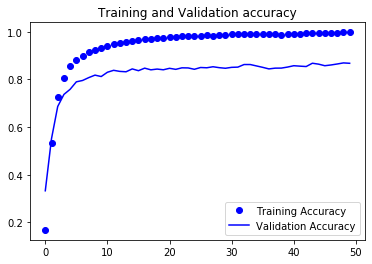

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


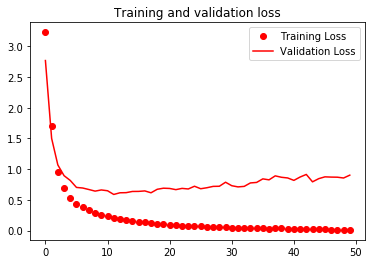

In [25]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


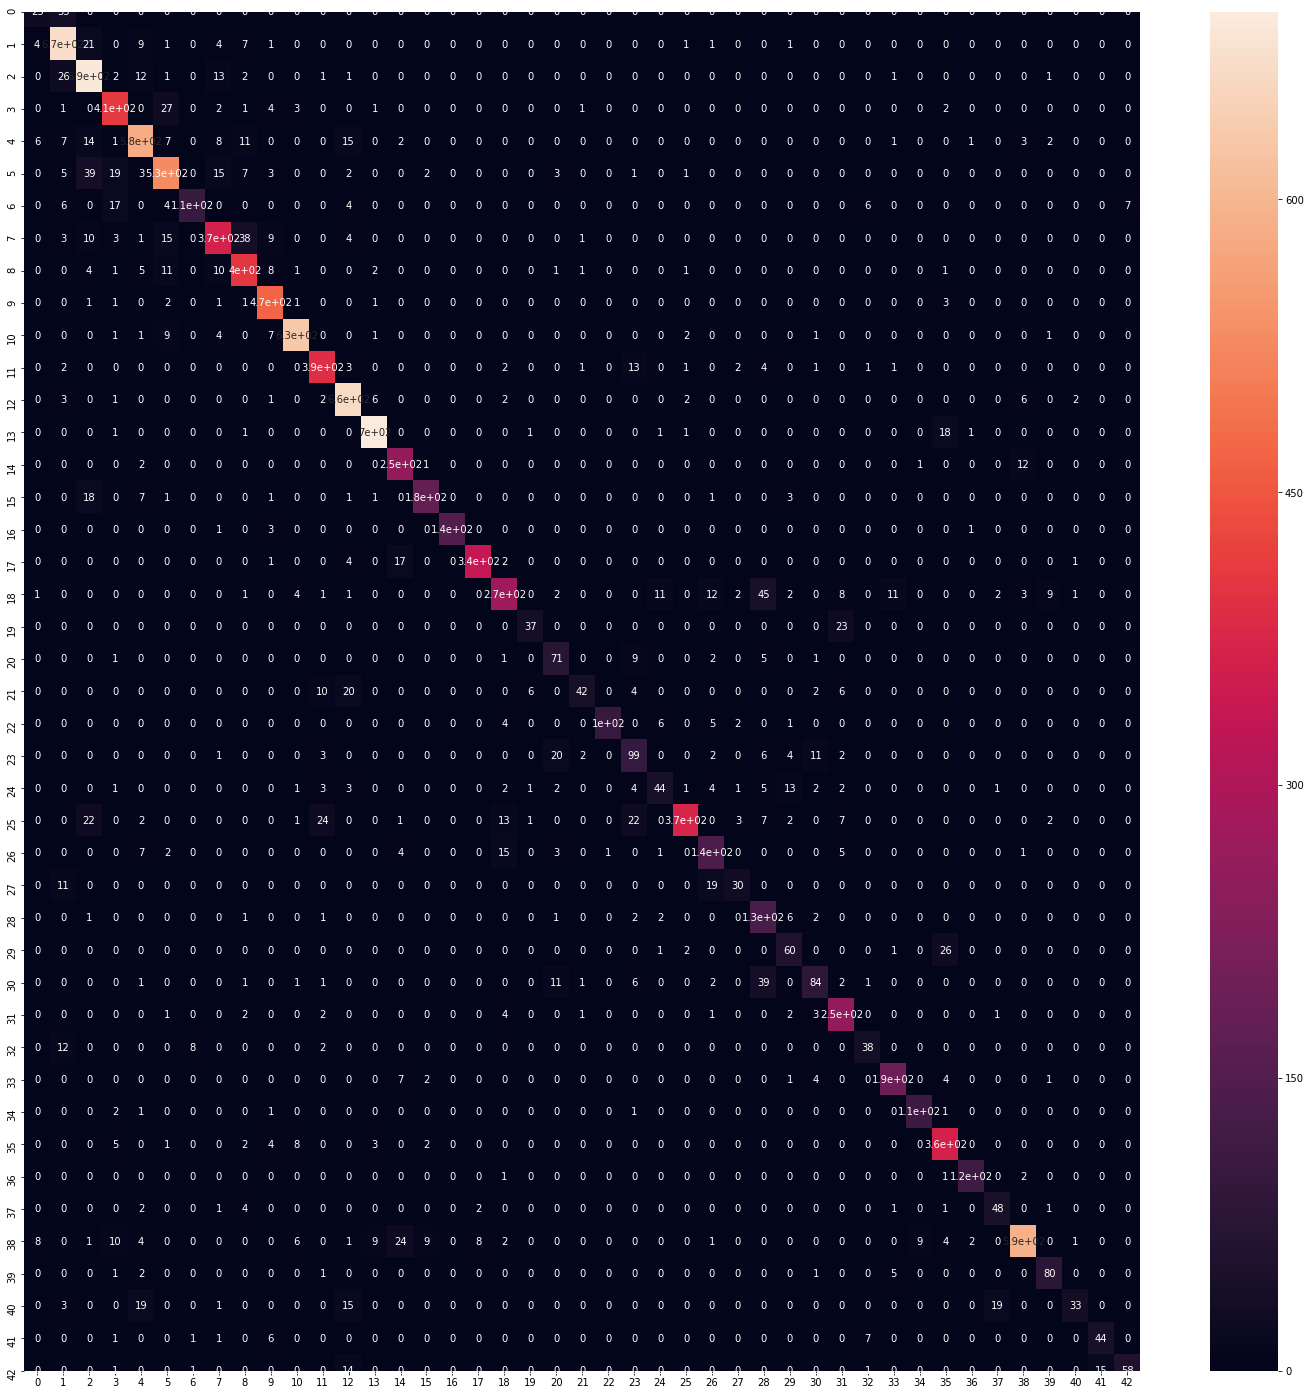

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

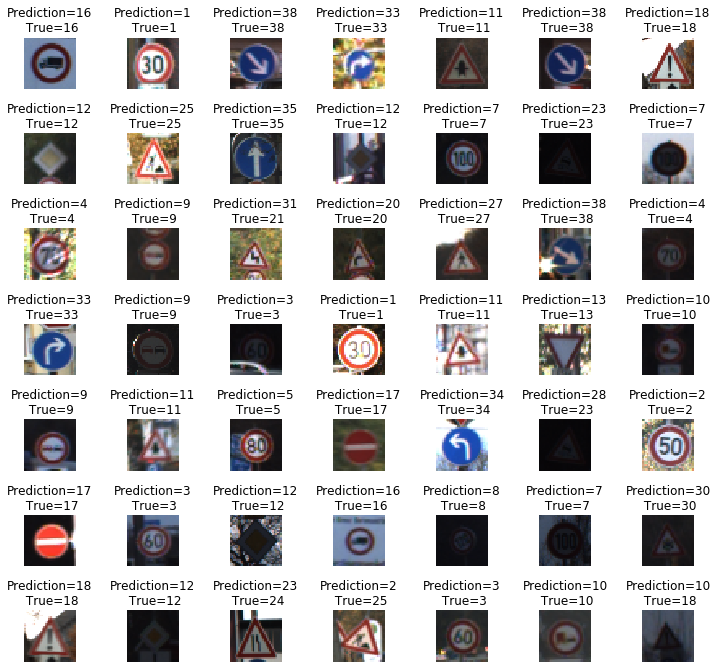

In [28]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)